In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,12]
from wordcloud import WordCloud, STOPWORDS
import scattertext as st
import re, io
from pprint import pprint
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("&lt;style>.container { width:98% !important; }&lt;/style>"))
import string
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

In [98]:
tweets_df = pd.read_csv("Tweets.csv")

In [99]:
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [100]:
airlines=pd.unique(tweets_df['airline'])
airlines

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [101]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

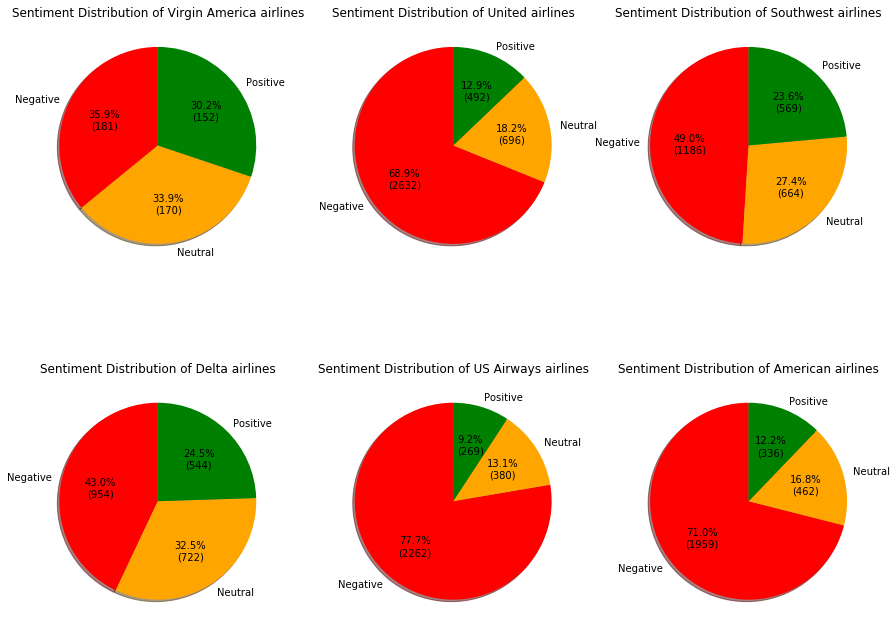

In [152]:
i=0
plt.figure(1,figsize=(15,12))
for airline in airlines:
    plt.subplot(2,3,i+1)
    airline_df = tweets_df[tweets_df['airline']==airline]
    count = airline_df['airline_sentiment'].value_counts()
    color = ['red','orange','green']
    labels='Negative','Neutral','Positive'
    #print(count)
    plt.pie(count.values,labels=labels, colors=color, shadow=True, startangle=90,autopct=lambda pct: func(pct, count.values))
    plt.title('Sentiment Distribution of' + " " + airline+" airlines")
    i+=1
plt.savefig('pie.png')
plt.show()

In [103]:
new_stop_words=STOPWORDS.copy()
new_stop_words.add('jetblue')
new_stop_words.add('virginamerica')
new_stop_words.add('americanair')
new_stop_words.add('southwestair')
new_stop_words.add('united')
new_stop_words.add('usairway')
new_stop_words.add('amp')
new_stop_words.add('usairways')
new_stop_words.add('flight')
new_stop_words.add('flights')
new_stop_words.add('thanks')
new_stop_words.add('thank')
new_stop_words.add('now')
new_stop_words.add('help')
new_stop_words.add('hour')
new_stop_words.add('co')
new_stop_words.add('will')
new_stop_words.add('s')
new_stop_words.add('t')

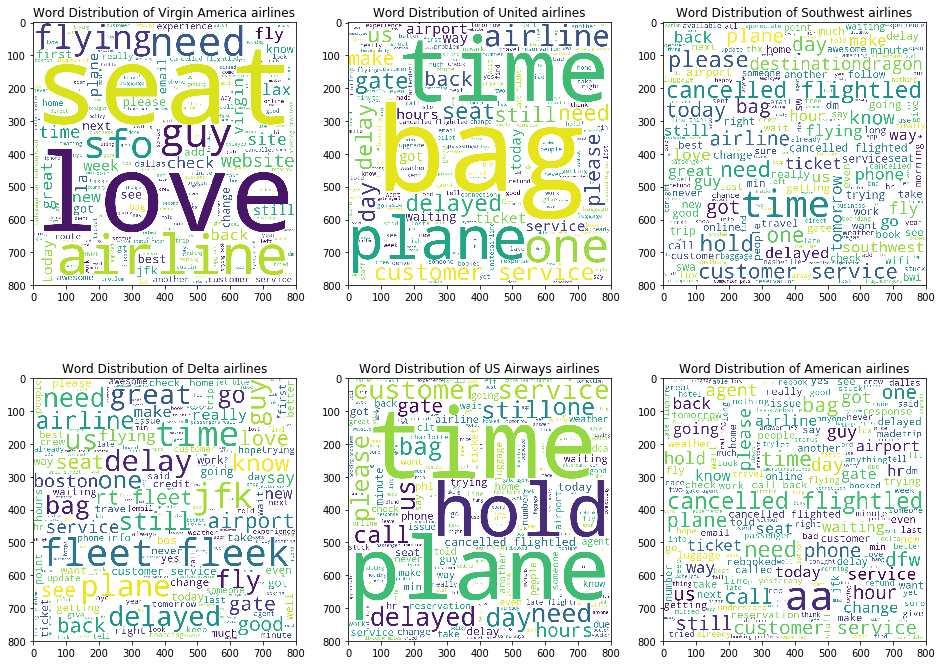

In [148]:
j=0
for airline in airlines:
    #print(i)
    plt.subplot(2,3,j+1)
    j+=1
    airline_df = tweets_df[tweets_df['airline']==airline]
    comment_words=""
    for val in airline_df['text']:
        
        # typecaste each val to string 
        val = str(val) 
  
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
          
        for words in tokens: 
            comment_words = comment_words + words + ' '
  
  
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = new_stop_words, 
                min_font_size = 10).generate(comment_words) 
  
           
    #plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.title("Word Distribution of "+airline+" airlines")
    #plt.axis("off") 
    #plt.tight_layout(pad = 0) 
plt.savefig('wordcloud.png')
plt.show()

In [105]:
nlp = spacy.load('en')

In [106]:
temp_df=tweets_df.copy()
#temp_df['parsed'] = temp_df.text.apply(nlp)
temp_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [107]:
wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

In [108]:
temp_df['text'] = temp_df['text'].apply(lambda x: x.lower())

In [114]:
for airline in airlines:
    if(airline=="Virgin America"):
        va_df = temp_df[temp_df['airline']==airline]
    elif(airline=='United'):
        united_df = temp_df[temp_df['airline']==airline]

In [109]:
parsed=[]
for val in temp_df['text']:        
    val = str(val) 
    tokens = tokenizer.tokenize(val)
    final_tokens=''
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
    #for i in range(len(tokens)): 
        #tokens[i] = porter_stemmer.stem(tokens[i])
    #for i in range(len(tokens)): 
        #tokens[i] = wordnet_lemmatizer.lemmatize(tokens[i])
    for i in range(len(tokens)): 
        if(tokens[i] not in new_stop_words):
            final_tokens=final_tokens+" "+tokens[i]+" "
    print(final_tokens)
    parsed.append(final_tokens)

 dhepburn  said 
 plus  ve  added  commercials  experience  tacky 
 didn  today  must  mean  need  take  another  trip 
 really  aggressive  blast  obnoxious  entertainment  guests  faces  little  recourse 
 really  big  bad  thing 
 seriously  pay  30  seats  didn  playing  really  bad  thing  flying  va 
 yes  nearly  every  time  fly  vx  ear  worm  won  go  away 
 really  missed  prime  opportunity  men  without  hats  parody  https  mwpg7grezp 
 well  didn  d 
 amazing  arrived  early  re  good 
 know  suicide  second  leading  cause  death  among  teens  10  24 
 lt  3  pretty  graphics  much  better  minimal  iconography  d 
 great  deal  already  thinking  2nd  trip  australia  haven  even  gone  1st  trip  yet  p 
 virginmedia  m  flying  fabulous  seductive  skies  u  take  stress  away  travel  ahlxhhkiyn 

 sfo  pdx  schedule  still  mia 
 excited  first  cross  country  lax  mco  ve  heard  nothing  great  things  virgin  america  29daystogo 
 flew  nyc  sfo  last  week  c

 absolute  best  team  customer  service  every  time  fly  m  delighted 
 provide  complimentary  upgrades  first  class  available  seats 
 need  change  thats  scheduled  9  hours  120  min  wait  time  phone  im  calling  intern 
 completely  awesome  experience  last  month  bos  las  nonstop  awesome  depart  time  vabeatsjblue 
 watch  oscars2015  jfk  gt  sfo 
 882  cancelled  flightled 
 failing  customers  check  process  link  tsa  pre  check 
 fidifamilies  us  terrible  airline  gave  us  hotel  hotline  number  said  sorry 
 number  276  sfo  cabo  san  lucas  arrived  yet 
 chrysichrysic  assistance  yesterday  u  cancelled  flightled  give  us  hotel  hotline  shame 
 another  delayed  likingyoulessandless 
 need  register  service  dog  first  class  ticket  sfo  gt  dulles  phone  queue  longer  pls  advise 
 rock  making  watch  oscars  redcarpet  oscars  oscars2015 
 reallytallchris  dropped  track  https  zv2pt6trk9 
 always  xoxo 
 book  seats  buy  even  check  c

 plans  start  flying  direct  dal  las 
 big  love  gratitude  mpower  w  1agr9kncpf  werin  oscars2105  vipswagbags  avalonhollywood  ybmbgs0dhn 
 re  great  job  adding  little  luxuries  aesthetics  improve  air  travel  experience  keep 
 requested  window  seat  confirmed  window  got  stuck  middle  seat  good  way  treat  silver  member 
 grand  budapest  hotel  oscarscountdown 
 missed  newsvp  next  trip  407 
 wtf  paid  direct  purpose  stop  fuel  exhausted  frequent  flier  nothing  inconvenience 
 something  wrong  website  safari  iphone 
 gate  checking  baggage  full  dfw  lax  883  giving  early  boarding  sweet 
 already  checked  page  expired  x 
 boo  refunding  seat  upgrade  fee  want  buy  first  place 
 shares  rise  q4  financial  results  usa  today  lfs4pefe6y 
 adds  pillows  instead  lie  flat  seats  first  class  arms  race  rgywjbbhm4 
 see 
 way  take  advantage  mayweatherpacquiao 
 know  m  flying  virgin  fight  mayweatherpacquiao 
 inflight  team

 atlantic  ploughs  lone  furrow  middleeast  fvudmh27pf  thenationaluae 
 atlantic  ploughs  lone  furrow  middleeast  dcobokn7ee  thenationaluae 
 atlantic  ploughs  lone  furrow  middleeast  vw4p4t4tlh  thenationaluae 
 omg  omg  nonstop  dallas  austin  virgin 
 planes  really  pretty  thought  u  know 
 flying  hawaii 
 m  pulling  hair  trying  book  u  site  doesn  work  iphone  ipad  don  computer 

 support  ticket  15  days  incident  150202  000419 
 good  home  texas  moodlighting  n3bvzty3zi 
 even  open  laptop  seat  4c  paid  premium  let 
 seat  4c  even  open  laptop  paid  extra  seat 
 guys  starting  end  month  guess  m  still  road  tripping  feb  27 
 needing  way  make  austin  trips  dca  ve  come 
 announced  new  route  austin  w  fares  39  way  ga8pbamu0c 
 really  sprint  thought  guys  kewl  0_0 
 cool  never  ur  planes 
 39  dollar  lax  las  fares 
 great  well  deserved 
 fyi  info  email  address  say  contact  password  reset  emails  doesn  exist 

 internet  great  thing  emailing  executives  company  maybe  respond  timely  manner 
 need  use  chase  club  pass  8yr  old  son  come  pass 
 suppose  number 
 thats  weak  see  ya  hey 
 flew  back  w  company  didnt  earlier 
 lost  voucher  given  miami  aeroport  jan  26  use 
 trying  book  awards  september  need  aegeanairlines  show  even  w  many  award  seats  availab 
 sure  drive  total  3  hours  bag  d  explain  debacle  one  wants  talk 
 cheertymedad  gee  almost  caring  ppl  think  m  int  trusted  adult  w  daughter 
 see  told  repeatedly  pilot  late  kept  getting  late  flightr  boarded  defibrillator  issue 
 preferred  security  line  anymore  tsa  pre  check  didn  pull  silverairways  partner  platinum  spoiled 
 newarkliberty  airport  need  indicate  different  gate  terminals  c  flyingainteasy 
 yes  please  newly  married  trying  update  last  name  preexisting  international  seems  easy 
 refuse  reissue  400  lost  voucher  plane  didn  take  du

 tourist  wonder  super  tides  tide  century  french  u  coasts  gxdqortss0 
 yeah  sorry  always  problem  international  reputation  problems 
 yall  probably  work 
 maybe  bbbne_sd_ks_ia  care  hear  went  whoever  listens  issues  caused 
 wonder  sharing  fb  insta  produce  number  140  characters  really  limits  story  telling 
 re  telling  number  call  left  airport  negligent  pilot  staff 
 email  resent  doesnt  appear  arrived 
 yes  please  trying  pop  newark 
 follow  order  dm  come 
 25  coupon  make  broken  entertainment  system  9  seriously  ridiculousness  learncustomerservice 
 didn  drop  bag  overnight  m  leaving  week  supposed  hold  bag 
 dm  details  still  response  book  today 
 know  probably  way  cheaper  airfare  ticket  leaving  hours 
 someone  please  explain  process  happens  property  found  plane  passengers  leave  heathrow 
 able  dm  confirmation  number 
 ve  sent  message  let  know  got  m  twitter  literate  really  going  stuck  1

 lost  bag  process  broken  agent  promised  d  call  hold  bag  found  re  waking  3am  w  delivery  fail 
 people  counter  helpful  see  nobody  austin  10  55  still  sitting 
 unfortunately  still  tarmac  fly2ohare  definitely  missing  ride  flypdx  gonnabealongnight 
 darquenloveli  regret  hear  please  let  us  know  need  assistance  kn  finally  able  secure  seat  thx 
 time  check  open  ua80  manchester  newark  today 
 good  know  open  closed  doors  premier  passengers  safety  briefings  delayed  annoyed 
 dm  sent 
 yea  phoenix  already  delays  day  people  bullshit 
 consolation  staff  stellar  delays  encountered  every  one  4 
 ua3576  gate  b1  tell  ray  somehow  made  736  iah  didn  wait  917  one 
 unfortunate  tumitravel  xmas  gift  looks  razor  ripped  right  front  pocket  picture 
 asking 
 lost  bags  cancelled  flightled  delhi  call  centers  poor  staff  spread  thin  stressed  name 
 yes  doesn  make  mistake  less  absurd  doesn  change  fac

 dmed 
 ll  touch 
 karen  salisbury  iah  amazing  customer  service  found  daughter  bag  lost  ua1516  made  day 
 3  days  late  flightr  bag  left  iad  helping  everyone  tells  different  story 
 renoairport  hi  direct  houston  reno  begin  don  see  days  march 
 continental  chicken  feat  fairs 
 assist  current  status  flt  1016  dfw  tomorrow  6  55am 
 left  comment  customer  care  contacting 
 lose  gate  checked  bag  den  ord  direct  ugh 
 caught  earlier  ord  gate  checked  bag  ve  lost  o  hare  original  lands  20minutes  frustrating 
 yes  much  whitterbug  see  spoke  reservations  team  ve  reinstated  ey 
 captain  behalf  front  office  welcome  board  never  heard  laughed  hard  funnycaptain 
 please  follow  dm  missing  bag 
 clear  luggage  comment  referencing  photo  attached  6232  jac  pnbajfkmhg 
 great  fares 
 left  item  plane  calling  non  stop  one  answering  please 
 awesome  ll  book  next  christmas  vacatinn  december  ways  want  de

 disappointment  today  simply  put  rather  unpleased  things  currently  delayed  cant  wait  home 
 round  trip  non  english  speaking  friend  stranded  twice  12  hours  time  staff  members  rude 
 found  group  people  actually  hates  people  isis  thats  right  airlines 
 nope  walked  orf  terminal  agent  found  showed  last  minute  board  us  many  panicked  people 

 time  finally  dallas  driven  less  frustration  cheaper 
 m  trying  final  destination  need  compensation  2hrs  personal  time  wasted 
 guy  really  customer  service  clue  spent  effort  clearing  bins  rollerboards  instead  art  projects  mine 
 priority  iove 
 pleased  premier  platinum 
 put  bag  plane  seattle  1212  waiting  line  talk  someone  bag  status  matter 
 campilley  hahaha  weren  american  company  say  great  sarcasm 
 think  actually  screen  campilley 
 apparently  asking  20  people  board  plane  big  miscalculation  made 
 shame  choosing  may  difference  reuniting  aging 

 wow  even  answered  back  awesome  customer  service  usairwaysfail 
 first  time  flying  us  medical  info  looking  practical  adapted  seat  cushion  allowed 
 noooooooooooooooooooooope 
 oh  sure  planned  occurs  absolutely  consistently  usually  yyj  cancelled  flightled  daily 
 jms2802  outsource  airlines  customers  loving  outsource  outsource  outsource 
 hi  im  flying  sfo  lax  sal  clo  connecting  time  lax  1h45m  enough  time  collect  bag  recheck  av 
 need  follow  back  tho  dm  x 
 getting  better  d  suggest  senior  manager  gate  retrain  gate  people 
 states  faundation  faith  judeo  cristian  ideologias  mwbk68k0a3 
 jms2802  nothing  supporting  mechanics  maintenance  workers  instead  puts  video  timco  wifi 
 sent 
 already  missed  connection  ugh 
 jms2802  sure  show  video  outsourced  favorite  timco  knack  substandard  maintenance  work  aircraft 
 formally  complain  customer  service  handler  misconnected  denied  boarding  lost  bag 
 

 late  crew  btv  last  nite  delayed  todays  flt  miss  connection  cun  play  hotel  tonight  ewr 
 aren  called  check  worstcustomerservice 
 passengers  rerouted  match  intended  arrival  time  even  incur  cost  put  us  airlines 
 solved  finally  picked  second  time  called  response  jh  7  21  dulles  works 
 need  work  flierfriendly  program  least  clue  attendants 
 space  doctors  notes  everything  first  trip  lost  first  suitcase  among  issues  pleased 
 new  flierfriendly  garbage  cry  attendant  find  place  medical  supplies  limited  overhead 
 epic  fail  reagan  jetway  15  mins  tarmac 
 gate  iad  rdu 
 link  finally  arrived  brussels  9  h  schedule 
 operated  b767  300er  newark  zurich  zrh_airport  replacing  b767  400er  6may  23sep  instead  till  23oct  avgeek 
 2nd  two  weeks  lost  bag  taking  1k  status  neveragain  worstcustomerservice 
 hi  phone  number  reservations  venezuela 
 request  ticket  change  twitter 
 ua1130  nightmare  poor

 maybe  hiring  ground  staff  lax  multiple  gate  agents  tell  baggage  loaded  expect  hopeless 
 basically  need  leave  hawaii  late  evening  midnight  back  philly  late  monday  night  trips  tues 
 encourage  re  interview  sole  attendant  ual  6166  buf  ord  blatantly  stable  uncomfortable 
 second  time  cancelled  flightled  really 
 really  1st  flt  frm  iad  2  iah  late  going  via  nashville  inconvenience  downgraded  ticket 
 yes  please  going  drive  6  hours 
 impressed  super  fast  reply  cgjase 
 hi  jp  awesome  tsa  representative  able  taken  care 
 first  complaint  filed  feb  11th  10  days  still  response  disappointed  surprised 
 morning  4603  delayed  7  hours  newark  10am  meeting 
 please  stop  spending  mktg  branding  ads  use  savings  improve  cxp  1hr  wait  luggage  due  short  staff  unacceptable 
 child  two  years  old 
 430am  wife  still  doesn  luggage  promised  8pm  said  way  file  number  dca48810m  fail 
 trying  change  on

 currently  crying  wanted  ski  tomorrow  prolly  boy  tryna  fulfill  dreams 
 tried  online  tracking  said  something  attempting  locate  luggage 
 worker  told  us  call  d  talking  someone  thailand 
 going  3  days  tomorrow  still  haven  received  bag  toronto  love  see  seriousness 
 nothing  compensation  given  circumstances  feel  must  something 
 disconnect  pr  group  actual  business  strategy  employee  attitude  ground  liars 
 go  2  3  segments  sfo  new  york  rt  delayed  2  hrs  suck  bad  maybe  another  line  bus 
 really  screwed  dealing  mechanical  failure  maui  san  francisco  poor  communication  bad  getting  connections 
 don  delayed  bags  let  happen  much 
 delay  due  customer  service  20  people  dis  service  provided  100  flightfail  hour20delay 
 excellent  reliable  happycustomer 
 doesnt  give  2  shits  customers 
 funny  none  ur  tweets  back  helpful  want  read  ya  ll  change  customers  better  service 
 travelling  melbourne  a

 sent  next  hayden  steamboat  hdn  denver  m  hoping 
 pick  bring  shuttle  went  double  check  said  still  concourse 
 honestly  couldn  tell  know  originally  going  brought  concourse 
 missing  day  vacation  see  husband  delay  stuff  happens  wish  handled  better 
 ua1534  11  different  departure  times  wtf  make  mind 
 making  everyone  wait  dark  newark  tries  figure  gate  go  incompetence 
 following 
 claudia  iah  terminal  b  travel  assistance  set  great  service 
 possible  add  known  traveler  number  ticket  booking  problems 
 doesn  daughter  booked  gold  member  miles  upgrade  list  tomorrow 
 award  longer  showing  available  possible  become  available 
 dfw  iad  cancelled  flightled  mechanical  rental  car  mdt  origin 
 iah  sfo  earlier  tonight 
 point  5  6  past  week  last  one  really  sucks  shit 
 thought  american  bad  horrible  service  2  30  min  late  excuse 
 ua1565  iah  gt  sjo  delayed  1  5  hours  crazy 
 don  know  detail

 d  rather  spend  two  days  back  seat  volkswagen  two  hours  plane  disgruntled  whatacluster 
 supposed  depart  boston  4  36  departing  6  30  due  issues  finding  pilot  lot 
 suppose  customers  enjoy  screaming  toddlers  problem  someone  complains 
 give  free  life  d  still  choose  purchase  tickets  competitor 
 first  time  flew  horrible  thought  give  second  chance  third  disgruntled 
 san  fransico  jfk  evacuated 
 4994  jackson  wyoming  delayed  pilots  full  toilets  deplaned  2ndary  mechanical  fail  cancelled  flightled  pending 
 far  worst  airline  ve  misfortune  flying  44  countries  ve  flown  outrageous 
 want  bag  1142 
 causing  us  miss  connection  6hour  delay  flydeltanexttime 
 see  talks  military  baggage  fees  please  guide 
 hope  lose  next  govt  contract 
 lost  bags  chi  eri  landed  1  5  hrs  ago  yet  still  zero  updates  unitedairlinessux 
 send  confirmation  number  home  safe  sound  pay  expensive  services 
 bag  stat

 appalled  lack  communication  awful  journey  2  21  ewr  bos  4  hr  delays  need  explained  better 
 m  dming  info  assisting  home  left  m  first  even  landed 
 boston  self  service  swipe  yr  boarding  pass  gate  difficult  tag  bag  easy  improvetheprocess 
 name  correct  original  confirmation  spelled  wrong  check  reminder  first  name  mi  run  together  cause  concern 
 people  catch  attendants 
 consistency  denver  agents  say  standby  checked  baggage  citing  faa  website  policy  says  time2switch 
 14  biz  days  18  calendar  respond  inquiry  hope  standards  universally  adopted  badcustomerservice 
 occur  guys  3  hours  extra  bag  due  delay  7  hours  fail 
 many  delays  today  hoping  12  26pm  boards  soon  premier1k 
 website  fucked  instead  416  ve  yesterday  514  today 
 called  back  ve  hold  issue  confirmation  number  email  shows  much  ve  paid 
 m  sure  experience  terrible  planes  dirty  staff  rude  start  perhaps 
 check  still

 two  service  agents  hung  third  able  us  air  today  three  calls  2  5  hours 
 delayed  days  mco  gt  iad  fingers  crossed  make  connection  home  albany  united1k 
 first  class  joke  compared  others  flown  don  ask  extra  peanuts  allowed  aircanada 
 given  connection  2  overnight  layovers  vouchers  last  connection  even  confirmed 
 leaving  3  year  old  row  360  lax  iad 
 baggage  damage  number  well  another  great  thing  trained  staff  whats  number  please  claim  time 
 100  put  together  serious  email  issues  arose  vacation  due  staff  post 
 fully  boarding  1689  morning  noticing  pilots  fail 
 long  wait  icing  cake  don  fix  reservation  system  confirm  doesn  changed  mid  travel 
 guys  suck  another  cancelled  flighted  every  issue 
 25  people  trying 
 lies  beqotlnugc 
 wouldn  let  real  nice  love  awesome  service  u  2  people  working  customer  service  line 
 6  plus  delay  washingtondc  finally  edinburgh  tired 

 don  b

 fact  treated  disrespectfully  lied  members  airline  claims  strive  best 
 matters  fact  re  different  destination  put  tremendous  amount  stress 
 1k  member  broken  seat  back  broken  tv  broken  light  lost  bag  gee  thnx  ua922  awesome  job 
 absolutely  disgusting  way  treat  customers  isn  anyone  actively  monitoring  cust  serve  unreal 
 nice  wonder  pick  respond  maybe  happy  customers  easier  wonder  many  left 
 averaging  200  minute  wait  times  tonight  ve  gotten  tonight 
 nothing  really  60  minute  wait  times  ve  call  back  4x  240minute  wait  times 
 re  customer  service  unbelievably  bad  abysmal  ve  phone  well  2hrs  tonight  hung  yr  ppl  3x 
 read  full  story  submit  case  team  pilot  6232  sleeping  dia 
 layover  canada  ua125  scheduled 
 inconvenience  weather  delay  pilot  deciding  waste  enough  time  faa  wouldn  let  fly  negligence 
 bought  ticket  price  published  mistake  got  email  indicates  cancelled  flightled

 9  56  desk  attendant  stated  sit  awhile  given  clear  lack  communication  seems  norm 
 suffering  immensely  merge  hopefully  ll  never  fly 
 d  really  plane 
 possibly  worst  airlinegave  three  chances  second  time  2  weeks  delayed  cancelled  flightled  due  mechanics 
 cabin  pressurization  issues  pretty  serious  1109  landed  washington  head  pounding 
 sandra  ur  international  checkin  counter  rude  offensive  commented  didn  care  complained  cuz  25yrs 
 contact  stuff  bag  m  legally  blind  messed 
 mention  plane  luggage  luggage  m  going  many  days 
 3  times  ve  called  customer  services  least  40  mins  time  cut  operators  call  back 
 tell  re  least  going  cover  room 
 omg  bumped  last  worse 
 speaks  basically  worst  designed  web  system 
 yeah  tried  10  times  two  different  tickets  told  try  late  flightr 
 please  fire  captain  6232  today  single  handedly  ruined  every  passengers  day  piece  shit  unitedsucks 
 u  blo

 friend  traveled  via  ua1470  today  never  got  luggage  recourse  person  buy  clothes  reimbursed 
 keep  getting  kicked  error  message  trying  purchase  p3n2w8jfps  tried  least  4x 
 way  message  international  gate  ewr  road  conditions  horrible  trying 
 hello  world  record  attempt  amount  ball  point  pens  collection  please  pen 
 culture  issue 
 rep  wouldn  rebook  waste  time  poor  communication 
 late  due  mechanical  issues  3  4  past  10  days 
 employees  almost  seem  happy  delivery  terrible  customer  service 
 service  desk  iad 
 2015  major  city  already  cancelled  flightled  24  hours  departure  due  weather  backup  planes 
 kurt  crew  ua1745  amazing  today  made  son  birthday  kindness  hope  fly  soon 
 hold  phone  well  half  waiting  make  reservation  change  wanted  make  online 
 2  2  instead  wait  plane  ottawa  never  came  m  back  home  try  tomorrow  suitcase  still  lost 
 m  glad  u  solve  prob  experience  remains  fly 


 taking  iad  afternoon 
 bangkok  17  days  spend  husband  mid  deployment  leave  asap 
 let  employees  know  good  service  kind  attitude  towards  customers  vital  kind  business 
 husband 
 need  assistance  line  door  travelling  3  kids 
 friend  o  hare  bc  say  proof  bought  1st  class  tkt  boarding  pass 
 gave  smile  today  zero  award  computers  sense  humour  jnqnbk7hut 
 right  tropic  air  san  pedro  belize  line  door  due  elected  appointed  hacks  kkedjnrtwo 
 take  compliment  mistaken  several  times  member  staff  time  remove  scarf 
 new  mileage  policy  awful  might  paid  slightly  miles  difference 
 anyone  assure  aircraft  coming  denver  left  previous  destination  3618 
 yes  refund  ticket  give  email  address  let  u  know  happened 
 2  speak  vp  custexp  jimmy  samartzis  sent  survey  email  awful  exp  otfz7cyguq 
 delayed  san  pedro  belize  scheduled  fly  3pm  belize  city  houston  wait  please 
 hello  take  care  call  center

 inspected  picture  routine  aircraft  check  cell  phone  faa  nyt  say  bngpli8jt6 
 airserv  contractors  aren  worth  wet  damn  30min  late  still  done  w  bags  ua1566  made  checkin  calamity 
 never  fly  terrible  service  ruined  entire  vacation  lostsuitcase  noreimbursement 
 web  app  won  let  upgrade  seats  call  center  wait  time  20  minutes  plus  want  legroom  pita 
 132  characters  cover  reasons  m  afraid 
 busy  cell  phone 
 really  fill  form  experience  sent  email  1k  email  address 
 left  gate  5  minutes  early  thoughts  doesn  count  sit  tarmac  half  comeonpeople 
 kudos  capt  herman  relayed  chief  pilot  emailing  someone 
 1665  departing  website  says  delayed  due  operational  difficulties  mean 
 teach  gate  agents  2  lie  learn  overhead  space  bag  didn  check 
 first  officer  ua  1514  checking  757  prior  departure  ewr  yesterday  cell  safety  1tfh2v0a7z 
 booked  lh  via  ua  gate  rebooked  late  flightr  lh  didnt  earn

 much  birthday  trip  tickets  confirmed 
 airlines  ua  1669  need  make  ua  3781  u  hold  plane  us 

 hear  guitar  damaged  december  use  guitar  earn  living  act  together 
 hold  20  minutes  talking  one  employees  asked  name  id  hung  face 
 hope  ve  received  far  ve  hold  someone  speak 
 tried  options  per  weblink  non  available  next  2  days  frustrating  notgoodenough  poorservice 
 asked  dm  ignore  please  assist  changing  another  today  21  feb  fra  mco  avoiding  iad 
 stay  business  poor  service  poorservice  notgoodenough  vo61lme5ja 
 airline  refuse  canadian  passport  less  6  months  remaining  validity  going  us 
 time  arrive  airport  6  15  domestic  san  diego 
 767  taxing  ord  fly2ohare  airlinegeeks  avgeek  upocmmulun 
 sent  dm  re  existing  reservation  one  responded 
 going  service  desk  see  options 
 miss  continental  days 
 next  time  bag  underweight  guys  credit  200  take  business  airline  cares 
 wasn  full  plen

 free  booze  bach  party  make  better  ord  gt  msy  delayed  enjoy  either  way 
 2  2  name  boarding  pass  think  might  really  need  ideas 
 sitting  seat  10d  back  vegas  chicago  someone  left  folder  looks  important  seat  pocket  1  2 
 incompetent  rude  service  today  missed  connecting  customer  service  desk  terrible  really  upset  w  untd 
 terrible  experience  ua415  17th  1st  exit  row  economy  zero  legroom  row  booked  return  change 
 5  5  hours  late  flightr  ve  transit  total  twelve  hours  please  change  plane  600  ridiculous  sfo 
 good  man  isn  fault  plane  maintenance  issues 
 delay  ua4636  painful  sure  hope  doesn  cause  luggage  miss  ua82  new  delhi 
 yes  unbelievable  free  fare  lock 
 battierccipuppy  puppy  cute  look  forward  board  high  five  ey 
 worst  airline  beware  maintain  plain  runway  past  4  hours 
 free  airlines  1997  anymore 
 existing  reservation  fine  talking  longer  0600  cmh  ord  option  0638  g

 don  understand  isn  paid  premium  getting  cancelled  flighted  best  next  available 
 awful  one  lavatory  functioning  people  lining  bumping  etc  use  1st  class  bathroom  ridiculous 
 current  board  food  menus  available  anywhere  online 
 airlines  changing  mileageplus  program  winners  losers  f1yvaio9ul  vglx6ykwqg 
 actually  aren  still  parked 
 put  sun  carry  rt  ant_kneee  right  0  heat  wave  enjoy  warmth  bring  home  jj 

 prompt  response  another  enjoy  vacation  perhaps  bug  app  still  shows  2  55 
 apply  one  travel  certificate  per  itinerary  even  multiple 
 appreciate  sentiment  able  ground  still  missed  connection 
 log  view  reservations  try  view  specific  reservation  takes  back  login  page 
 goes  round  round  going  weeks 
 prompt  assistance 
 3  times  delayed  miss  next  time  ve  lost  baggage  clean  clothes  337  thx 
 looked  email  chain  one 
 hell  miles  expire  really  looking  forward  accruing  enough  free  

 gives  belfast  hug  new  unmissable  bushug  format  impact  busads  thinkbus  belfastairport  avbdstjujs 
 worst  27aitzl6nd 
 haha  clean  plane  held  overnight  hangar  sounds  lovely  don  lie  screensand  say  weather 
 charge  delay  1612  still  waiting 
 adam_karren  zj76  save  200  checked  snowboard  trying  check  morning  website  wants  200  prem  gold 
 traveling  fra  thru  iad  mco  tomorrow  concerned  abt  iad  weather  change  advisory  issued  advice 
 made  feel  guilty  economy  plus  didn  pay  extra  leg  room 
 cancelled  flightled  new  5012  hopefully 
 4781  cancelled  flightled  5102newflight  upset  one  cancelled  rented  car  honest 
 enjoyed  heathrow  lounge  much  almost  missed  airnzusa 
 hi  1051  try  book  new  one  way  departure  shows  3  55pm  seems  accurate 
 stuck  ord  find  airplane  lol  upset  terminal  right 
 contact  requesting  charity  donation  thankyou 
 wth  honest  customers  better  last  change  driving  home  plane  lef

 tonight  seem  wndceo5qlk 
 rapid  trip  plane  ticket  idaho  california  doesn  problems  wonderful 
 agent  point  problem  don  want  mess  somebody  plans  u  flow  tech  team  pls 
 delayed  3  hours  one  frustrating  m  unable  decent  meal  never 
 please  went  beyond  made  us  number  one  priority 
 guys  awesome 
 thnx 
 think  status  nothing  think  bug  search  system 
 anna  palm  springs  gate  19  deserves  medal  handled  30  ppl  missing  pro 
 appreciate  answer  weren  alerted  cancelled  flighted  plane  landed  showsomerespect 
 wtf  delay  delay  15  hours  yvr  san  unacceptable  crew  availability  blame  never 
 think  left  phone 
 great  customer  service 
 awesome 
 hey  left  computer  bag  w  computer  inside  filed  online  report  response 
 empty  upon  takeoff  someone  sit 
 case  id  8473573  requested  2  5  2  19  7  10  days  ll  response  bs 
 nawww  fave  airline 
 formed  submitted  m  betting  someone  honest  enough  turn  though 
 lh  

 50  minute  wait  still  gate  broken  jetway  might  miss  connection 
 robcnyc  see  information  boarding  process  gbiw9ugfnm  kp  group  1  2  reason  3  5 
 bogota  wallet  fun 
 lost  wallet  1007  yesterday  houston  bogota  filled  online  form  response  yet 
 one  departure  time  still  update 
 following  see  one  experiencing  noticing  substantial  downgrade  service  post  merger 
 40  minutes  waiting  gate  broken  jetway  different  gate  maybe 
 never  got  austin  houston  time  connection 
 got  right  safety  demonstration  corporate  funny  reserved  corny  lwotkiekgu 
 sitting  tarmac  half  landing  jetway  broken  2daysofunitedfailures  1thingafteranother 
 look  twitter  history  usual  service  non  existent 
 reply  contact  customer  care  clarification  issue 
 give  couple  weeks 
 make  sure  make  cancelled  flighted  baggage  upgrade  fees  seem  labyrinth  might  able  swindle 
 considered  time  arriving  destination  half  late  flightr  schedul

 still  waiting  response  whether  allow  use  rear  facing  car  seat  erj145 
 nonrefundable  hence  wrote  200  doesn  make  sense  150  credit  nothanks 
 website  day  yesterday  tried  3x  put  info  didnt  go  thru  today  bought  went 
 realize  wife  waiting  delayed  moment  m  sure  understand  tweet 
 m  minor  freaking  bc  might  make  connecting  hawaii  yes  m  frustrated 
 sorry  ended  us  air  though  getting  back 
 denied  sure  charge  150  one  way  25  way  hime 
 estellevw  need  complain  twitter  refund  auto  applied 
 even  change  made  online  instructed  call  agent  maybe  syastem  allow  agents  2  link  passengers 
 case  id  8544484 
 pricey  chase  mileage  plus  cc 
 airbus  a320  seats  awful  don  recline 
 dm  follow  m  plus  re  options  fly  epicfail 
 great  way  start  vacation  time  departure  looking  forward  global  first  class  suite 
 2d  3d  embossed  badges  patches  superior  ones  currently  using  3fq3xelbon 
 sitting  plane  

 worried  cold  weather  snow  delay  us  morning  pilots  stillwaiting 
 rushed  6  degree  weather  airport  time  bad  pilots  didn  stillwaiting 
 refund 
 aisle  please 
 quick  reply  fill  form  idnumber8569822  hopetogetanswersoon 
 handed  slip  paper  said  call  1800  called  2x  day  trying  sent  still  layover  airport  ref  tho 
 staralliance  good  maybe  make  losing  medallion  probablynot 
 fine  ll  take 
 live  abroad  booking  problems  come  visit  states 

 recap  bounced  lied  hung  supposed  think 
 second  already  got  bumped  1st  love 
 said  need  supervisor  waiting  supervisor  hung 
 called  lady  overseas  call  center  said  saw  note  explained  situation 
 access  seat  map  said  note  upgrade  itinerary  call  back  late  flightr 
 spoke  someone  feedback  line  last  night  said  preferred  choice  seat  today 
 goods  ll  call  tomorrow 
 next  day 
 filled  form  haven  received  sort  email  confirmation  received  normal 
 loses  luggage  

 invite  fallow  helacohlc  learn  activities  prevention  programs  health  condom  rito  family  501  c  3 
 staralliance  nice  lhr  congrats  m  sticking  aa  ba  british_airways 
 long  take  miles  re  purchased  expired  show  recieved  email  request 
 please  stall  1535  ord  sna  tonight 

 gate  ua4727  turrible 
 worst  airline  lost  luggage  delayed  unaccomidating 
 280 
 1640  n33289  arrives  flytpa  following  iah  rvcda2nnme 
 officially  favorite  airline  created  magic  day  friendlyskies  careyon 
 wonderful  attendant  named  leah  us  lga  den  den  anchorage 
 protected  gate  agent  kerry  las  excellent  job  getting  destination  today 
 yes  dm 
 staff  deck  cabin  ua768  sfo  gt  bos  exceptional  today  please  tell  well  done 
 mean  real  live  person  somewhere  go  speak  newark  post  security 
 hi  bought  ebokeers  paris  miami  chance  check  everything  ok 
 worries  think  control  emails  keeping  informed 
 talked  standby  tomorrow  doesn

 sure  plane  late  ontime  departure  ship  sailed  away  long  time  back 
 ua6002  mli  gt  den  miss  connection  ua3530  den  gt  yeg  due  delay 
 come  airline  90  last  year  makes  check  carry  even  gate  check  baggage  claim 
 change  airports  actually  fay  cancelled  flightled  twice  180  taxi  ride  rdu  reimburse 
 operated  heathrow  newark 
 yes  course  treat  customer  recourse 
 stunned  bags  hartford  ord  ground  crew  move  bags  200  yards 
 someone  assist  dm  waiting  1  phone  2  hours  twitter 
 overbooked  offered  voucher  wait  take  another  gate  agent  switched  retracted  voucher  offer 

 helpful  understand  reduced  price  seats  sold  check  priority  certificates 
 million  miler  ve  delayed  plenty  never  amateurish  way  silverairwsys  d  embarrassed  affiliated 
 airlines  claims  low  fare  guarantee  won  honor  lower  fare  found 
 another  delayed  surprised  upset  m  mostly  disappointed  cancelled  trip  dad 
 still  dm  lh7631

 send  personal  plane  us  school  icing  don  want  stuck  ansleyhutson  emily_donneiiy 
 start  3xweekly  b737  900  neworleans  cancun  9may  5sep  avgeek 
 fail  set  song  axpn28xiqb  breaks  guitars  lt  lmao 
 yes  love  upgrade  voucher  please  give  call  9148445695 
 come  cheaper  fly  bkk  nrt  even  though  bkk  take  extra  nrt 
 regard  couple  weeks  ago  m  frustrated  policies  expressing 
 reaching  seat  hard  enough  cushion  ok  short  btw  ua6465  crew  great 
 surprise  don  good  feeling  airline 
 told  lost  guys  don  know 
 landed  day  late  almost  sleep  feel  sorry  woman  consoled  mother  died  night 
 6344  6373  sfo  dfw  1576  sfo  ord 
 disappointed  feed  small  children  5  half  honolulu  los  angeles  appalling  esp  food  waspaid 
 supervisor  miriam  provided  great  customer  service  finally 
 filled  airport  part  long  day  made  longer 
 today  staff  msp  took  customer  service  new  level  father  passed  away  last  night  helped

 son  passenger  3710  chicago  toronto  plane  came  within  feet  colliding  another  plane  stopped 
 made  mad  called  bag  number  person  helpful  told  bag  really  2  2 
 yes  airport  person  told  bag  still  nashville  filed  claim  1  2 
 thing  fella  done  right  today  pacific  time  zone 
 ugh  bags  sent  palm  springs  lax  promised  better  hotel 
 direct  messaged  didn  hear  anything  back 
 yup  happens  way  often  5  times  last  12  months 
 great  ll  send 
 handle  bag  issues  wouldn  put  onto  first  place 
 big  pilot  644  turning  1hr  tarmac  20min  delayed  arrival 
 returned  vacation  went  luggage  services  golf  bag  presented  clear  wrap  ve  used  first  place 
 holiday  lifetime  new  york  ruined  lost  luggage  failed  find  sunday  wontflyagainwithyou 
 golf  bag  didn  top  cover  staffers  said  couldn  check  without  type  cover  wrap  forced  leave  bag 
 offer  real  food  american  clubs  amazing  food  offer  heathrow 
 bag  lost

 obviously  staff  ewr  seen  ads  friendly  helpful  ewr  worst  airport 
 pre  select  seats  sfo  gt  yyz  m  canadian  booking  problems  azltjhf7lv 
 forelock  guarantee  fare  fare  seats 

 hypocrisy  rt  gg8929  m  sorry  re  able  offer  full  refund  exchange  rate  hoping  kp 
 shouldn  spend  hotel  weather  delay  weather  something  completely  control 
 eventually  approach  bags  alaskaair 
 nyc  delayed  miss  connection  sacramento  chicago 
 said  give  us  refund  30  days  late  flightr  refund 
 know  weight  plane  us  sitting  plane  2  5  hrs  convinced  company  safe  flt 
 showed  several  hours  early  tried  call  hold  15  min  b  f  call  disconnected 
 policy  changed  must  advise  time  purchase  choose  vary  airport  want  full  refund 
 wanted  cancelled  flightled  tickets  special  guess  even 
 m  0  3  booking  problems  without  major  problems  0  isn  bad 
 el_ingeniero  don  check  baggage  don  lose 
 m  hoping  don  miss  lax  ito  connect

 flt  4567  two  updates  last  3  minutes 
 busy  taking  needed  audition 
 never  given  one 
 quick  response  offering  assistance  lack  follow  really  service  expecting 
 stuck  iad  going  6  hours  waiting  ferry  nashville  u  tell  arrive  ridiculous 
 flt  4567  gate  agent  announcements  unprofessional  time  go  back  delta 
 kp  please  mention  quiche  breakfast  tandoori  chicken  dinner  entrees  accompaniments  truly  first  class 
 flt  4567  departure  time  changed  five  times  last  20  minutes  don  figure  solution  announce 
 bags  still  houston  friday  still  reimbursed  baggage  fee 
 tell 
 4567  already  cancelled  flightled  trying  home  two  days  staff  unhelpful 
 worse  last  attendants  don  even  know  whether  plane  equipped  power  outlets  seats 
 4567  agent  wandered  pilots  came  looking  went  charge  personal  phone  d  txting 
 waiting  4567  memphis  incredibly  rude  gate  agent  waited  departure  time  announce  delay  1  2  ru

 even  though  technically  land  silver 
 still  waiting  reply 
 please  see  attendant  isn  enough  room  head  bags  carry  save  time 
 wanted  bag  benefit  instead  25  pricing  three  tickets  adding  card  mp  visa  option 
 tried  2  dm  go  thru  sure 
 link  current  status  airports  fly  bwi  ewr  mco  morning  yet  yet  tell  problems  except  see  snow 
 delays  less  m  one  plane  connect  voucher 
 don  hope  nicer  time  try  things  right  sold  tickets  connetion 
 got  gate  iah  time  given  seats  closed  know  people  arriving  wait 
 yes  waited  line  almost  passengers  left  wanting  wait  past  1am 
 still  waiting  hit  one 
 although  m  happy  cancelled  flighted  home  tomorrow  phx  atl  dca  happy  easy  rebook 
 hello  hold  extremely  long  time  confirmation  boarding  pass  tried  numerous  times 
 m  teaching  new  travelers  research  budget  save  trip  today  qll48r57ep 
 frustrated  loooooong  wait  time  speak  live  person  boarding  pas

 mins  answer  wife  baby  need  arrived  2  hrs  prior  please  venetia  crook 
 wife  9  month  old  might  miss  next  direct  210  pm  mother  law  hold  customer  support  30 
 1614  fll  atl  wife  traveling  infant  line  check  baggage  200  people  long  due  computer  system  crash 
 sent  dm  let  know  oyu  need  additional  information 
 hey  friends  phone  list  number  ivr  hangs  multiple  times  sure  proceed 
 strives  customer  centric  everything  communications  advertising  customer  journey  etc  anamarketers 
 la  always  traffic  insane  one  issue  1625 
 insane  traffic  la  trying  call  re  schedule  phone  20  minutes  nothing 
 airline  trouble  getting  satisfactory  customer  service  contact  aqjn4hwnac  negotiate  resolutions 
 hey  southwest  find  nashville  washington  dc  raleigh  150  march  15  please 
 longer  change  trips  companion  online  years  message  done  online 
 adding  rr  number  marriott  stay  hard  won  take  rr  number  check

 happy  enter  sweepstakes  nutsaboutsouthwest 
 great  customer  service  today 
 vinyl  part  prize 
 beyond  ready 
 called  told  bag  made  phl  still  delivered  call  delivery  service 
 looks  brooding  skies  ont  evening  x9blwgwa68 
 monkey  business  luv  swa  mdw2mci  homeandreadyfornexttrip  2xjvun66zz 
 favorite  airlines  ve  never  issues  plus  crew  entertaining 
 way  give  voice  customers  pay  services  satisfactorily  delivered  justsayin 
 attendants  really  funny  sass  giving  life 
 genuinely  surprised  don  upgrade  people  cancelled  least  put  comparable  spot 
 following 
 someone  please  dm  customer  relations  number  website  customer  service 
 second  time  row  haven  received  text  updates  time  change  don  offer  won  use 
 cancelled  flightled  back  queue  want  charge  200  business  class  stay  classy 
 hope  flyers  credit  sort  delays  cancelled  flightlations  shittydeal  notimpressed 
 taylorlumsden  taylor  u  gotta  love  swa 

 fair  set  payed  full  seat  access  full  seat  sba0aricyq 
 sorry  bother  ve  hold  2  hours  30  minutes  continue  holding  call  back 
 another  great  trip  lax  823  las  3075  bna  much 
 checkin  lame  business  really  last  seat  broad  shoulders  haha 
 yeah  re  somewhere  hopefully  getting  back  today  frustrated  tweeting 
 completely  understand  act  god  weather  relate  flightd  cancelled  flightlation  4  days  without  reimbursement  kind  unacceptable 
 expensive  go  vegas  stops  late  june  non  stop  competition 
 delayed  twice  cancelled  flighted  sent  complaint  email  yet  response  need  explanation  pls  notsatisfied  smh  unhappy 
 got  nice  lady  phone  georgia 
 resume  don  see  open  schedule 
 understand  weather  kids  need  home  nice  kids  volunteer  work  ri  high  school  please 
 quick  reply  travel  lot  much  lol 
 sound  hopeful  thin  device  hope  right  person  found  time 
 bag  shown  luv  make  phl 
 regret  flying  morning

 jparkermastin  customer  service  passive  response  disappointed  flown  sw  rethinking 
 broke  stroller  wife  baby  gate  checked  told  problem  calling  list  preferred  line 
 joke  return  delayed  3  row  new  record  guys 
 nbd  able  figure  workaround  wanted  got  bags  less  24  hours  late  flightr  muchas  grassy  ass 
 luggage  delivery  1  4am  really  told  midnight  multiple  times  lie  crazy  bad  business 
 thx  follow  sent  dm 
 don  common  courtesy  phone  call  answered  either  policy  bad  people  fired  dissaponted 
 ty  consideration 
 apologies  whatever  please  deliver  bags  said  feel  employees  lying 
 robot  running  account  one  doesn  remember  anything  ask  conversation 
 never  really  lost  put  another  knowledge  weren  sure  ty 
 crew  wn3946  san  sfo  brilliant  rita  hilarious  know  ve  great 
 responding  specialolympics  athletes  notcool  southwest 
 whole  family  special  olympic  athlete  even  call  617  653  3040 
 really  

 unpleasant  experience  phone  one  agents  re  cancelled  flightled  name  agent  id 
 wifi  angering  slowness 

 ve  gate  long  time  re  gonna  miss  connection  mdw  ack  qrxvzfrd1z 
 tweeted  several  times  last  week  info  storm  always  timely  tweet  back  thx 
 sort  m  arriving  day  late  incur  overnight  costs  connecting  city  cool 
 promised  4  rooms  wednesday  wentook3  hotel  charged  us  79  per  room  pink  paper  needed  white 
 sent 
 rules  probably  apply  times  sometimes  shouldhaveflownjetblue 
 hold  music  sounds  super  mario  bros  gameboy  color 
 props  las  employees  working  c11  gate  opposed  flying  las  future 
 baggage  delivery  bwi  delayed  unnecessarily  chaotic  disappointing  long  trip  frequent  traveler 
 carriers  flying  way  past  sw  cancelled  flightlation  alaskaair  got  passengers  much  late  flightr 
 extremely  frustrating  travel  experience  denver  instead  landing  sea  saturday  monday  afternoon 
 calling  someon

 impression  8  delay  equipment  failure  compensation  offered 
 give  info  flt  681  bdl  see  cancelled  flightled 
 stuck  nyc  cancelled  flightled  2  days  row  long  wait  times  phones  running  swa 
 reinstate  cancelled  flighted 
 great  example  customer  service  morning  msy  headed  atl  alison  bobbi  fantastic  gate  b8 
 m  running  money  keep  paying  hotel  rooms  food  nyc  don  people  spent 
 cancelled  flightled  tried  refund  hold  departed 
 offers  atlanta  unprecedented  perk  nustgpelsf  be0b4k1xbt 
 want  pick  customer  spiritairlines  sign 
 cancelled  flighted  sunday  9  50am  dallas  next  tuesday  afternoon  stranded  bs  getmeouttahere  southwestsucks 
 woman  got  chance  lifetime  destinationdragons  imaginedragons  slaycancerwithdragons 
 use  luv  swa  counting  hold  cancelled  flighted  noluv 
 luggage  y  bc  ur  n  won  end  ur  goin  6zj6l2ztua 
 10  hrs  hanging  oh  understand  things  crazy  n  sometimes  10  hours  isn  long  enoug

 ah  still  wish  someone  picked  phone  3hrs  dead  phone  taking  tweet  refund  confirmation 
 opal  dragon  book  dragon  ali  woven  murdering  ways  philippines  australia  c9p2iosphm 
 cancelled  cavalli  calves  interfering  onboard  equipment 
 gate  attendant  mccarran  c16  vegas  dallas  went  beyond  long  day  frustration  welcome 
 please  refund  ticket  terrible  experience  southwestfail 
 three  cheers  denver  staff  don  know  re  keeping  us  smiling  rx8z53m7yy 
 conf  8q6mfd  finally  got  told  completely  booked  better  info  advise  2  call 
 lost  bag  vegas  el  paso  going  dallas  love  gate  attendant  said  see  coordinate  love 
 breaking  heart  bwi  9  hrs  business 
 officially  customer  support  game  wills  2hr30  hold  loser  oh  yeah 
 gave  1  hr  32  minutes  hold  maybe  put  people 
 3  hrs  w  bags  returned  us  2464  cancelled  flightled  maybe  put  couple  people 
 switch  airlines  eat  difference  insubstantial  cancelled  plans  s

 provide  direct  assistance  colleague  re  book  b  c  ticket  booked  via  corporate  account 
 flying  back  denver  tomorrow  rebook 
 cancelled  flighted  rebook 
 follow  send  dm 
 never  got  confirmation  ve  hold  info  online 
 follow  dm  please  need  confirm  cancelled  flighted  reservation 
 going  file  formal  complaint  never  happened  please  direct  us  right  department 
 trying  change  ticket  travel  monday  changed  online  anyway  faster  waiting  hold  anhour 
 prompt  consumers  prompt  customer  service  instead  customers  hold  1  5  hrs 
 won  let  change  reservation  online  m  wasting  time  mha3xxaed5 
 hire  customer  service  agents  half  long  hold 
 dm  sent 
 hold  expect  customer  service  disappointed 
 m  upset  lied  told  ice  runway  every  carrier  able  fly  airport  confirmed  ice 
 bgr1061  luv  swa  employees  use  always 
 call 
 book  fly  standby  allow  check  takes 
 husband  responding  insist  remove  seat  btw  signs  eng

 m  going  need  answer  phones  hold  isn  okay 
 almost  hold  swa  inexcusable  hiremorepeople 
 favorite  airline  wait  book  new  orleans  trip  april 
 suggestions  tell  customers  approximate  wait  times  hold  50  min  allow  cancelled  online 
 telling  us  cancelled  flightled  helping  us  anyway  ruining  birthday  worstcustomerservice 
 tkt  grp  cxld  gets  stuck  back  cs  site  phone  agents  took  1h  rebook 
 loving  boarding  go  chicago  keepitmovin 
 flt  3260  mht  fun  kids  grandkids  10  jack  says  hi  bhooiyt6zq 
 jumped  gun  little  cancelled  flighting  airline  cancelled  flighting  louisville  re  ruining  vacation 
 apologies  nice  supvsr  sally  cle  offered  one  usual  gr8  southwest  customer  service  love 
 hold  two  hours  timed  great  system  got 
 rocks  horror 
 plans  implement  call  back  system  reflight  booking  problems  line  hold 
 nothing  love  hold  liqwoblfbt 
 imaginedragons  destinationdragons  scavenger  hunt  rules  vhgk

 yall  still  fly  cold  right 
 pls  resolved  reimbursement  made  gracias  rico  pls  send  private  msg  phone  number  email  address 
 list  preferred  line  phone  wait  15  minutes  hung  feeling  list  ey 
 stop  getting  credit  card  apps  already  card 
 handling  glad  southwest  cares  flyers  think 
 bingo  bringing  attention  ll  happy  reach  noah  make  right  mr 
 oops  sorry  done 
 come  mobile  proceed  w  o  entering  postcode  purchase  m  ireland  don  postcode 
 tsa  pre  isn  showing  boarding  passes  ve  followed  steps  please 
 need  follow  first 
 m  sure  messaging  part  right  please  let  know  received 
 love  luv  addition  passbook  option 
 follow  glad  bag  back 
 denver  phoenix  think  re  finally  getting  ready  take 
 companion  pass  broken  today  purchase  error  invalid_loyalty_member_account_status  sw900001  vyil1xklrog24fs  918j_a 
 guys  fuck  never  forgive 
 m  smashed  window  giant  guest  sitting  next  4386  way  guy  given

 left  something  plane  landing  midway  last  night  responsible  adult  got  number  call  ty 
 hi  got  tsa  pre  check  put  acct  boarding  pass  p  m  updated 
 mdw  gates  many  fewer  seats  planes 
 really  1  5  hours  plane  gate  jax2bna  haven  waited  days  home  notokay 

 option  cancelled  don  want  change  want  cancelled 
 time 
 lastly  company  trying  put  love  flying  nice  someone  personally  address  concerns 
 letters  follow  sure  include  rewards  number  twitter  handle  email  address 
 2078  balt  hit  turbulence  babies  cried  kids  vomited  chaos  attendant  caroline  superhero 
 way  number  1703  please  feel  free  fact  check  complaints  leave  time  baggage  time 
 finally  got  home  bnasnow 
 therefore  ve  received  recourse  phone  submitted  email  complaint  letter  via  mail  follow 
 consider  loyal  customer  brand  m  astounded  lack  concern  customer  flying  experiences 
 experience  worse  flying  experience  ve  met  w  contem

 got  rebooked  tomorrow 
 hi  saw  black  history  month  commercial  tv  im  excited  support  month  grant  1  free  trip 
 took  bos  bwi  plane  stl  promised  replacement  1  5  hours  late  flightr  2  5  hours  delayed  happy 
 though  work  another  major  airline  love  black  history  month  commercial 
 large  group  majority  30  bags  soaked 
 black  history  commercial  really  sweet  well  done 
 even  50  voucher  picking  bag 
 first  interaction  people  morning  bad  weather  sorry  wont  flying 
 yeah  told  next  drove  wasnt  drove  second  time 
 much  respect 
 letting  dm 
 imaginedragons  gonna  know  math  test  tomoro  concentrate  destinationdragons 
 thankful  feelingtheluv 
 im  praying  home  alive 
 hope  re  happy  officially  become  next  profitbeforepeople  imo  bankrupt  2020 
 delays  throw  priority  boarding  way  ll  forgive  southwest  southwestairlines 
 got  added 
 great  best  luck  dealing  horrible  winter 

 needed  info  add  rapid  r

 tsa  pre  boarding  pass  mean  0hmmqczkcf 
 still  stranded  dc  sat  3  30am  100  kids  starving  exhausted 
 211pilot  spilled  tea  radio  yay  delays  almost 
 sent 
 haha  yeah  making  joke 
 much  stepping  game  making  day  night  elevator  music  much  appreciated 
 used  love  keep  rescheduling  southworst 
 start  ve  already  wasted  1  5  hrs  phone  wait  time  already 
 talking  customer  service  makes  appreciate  even  learn  much 
 brother  girlfriend  cancelled  flightled  3  times  leaving  72  hours  late  dropping  letter  grades  school 
 email  rr  pts  gain  wasn  clear  mine  gone  anything  u  appreciated 
 response  able  situation  resolved  fan  mother  nature  today 
 way  add  known  traveler  number  existing  reservation  online 
 needs  offer  college  student  discount  fly  home 
 cancelled  flightled  bna  bna  2  mdw  tomorrow  stranded  den  ve  hold  day 
 think  ve  got  figured 
 lga  san  diego 
 missing  6  000  points  one  account  r

 ve  hold  59  57  type  ridiculous  need  link  chart  routes  time 
 sent 
 cancelled  flightled  reflight  booking  problems  online  worked  second  round  hold  3  hrs  options 
 kudos  rsw  cs  crew  re  routing  pax  alleviate  sale  due  graded  eqp  800  500 
 trying  fly  nashville  tomorrow  looking 
 think  nashville  cancelled  flighted  tomorrow 
 try  customers  destinations  another  airline  3  days 
 m  list  preferred  customer  loyal  swa  inflight  wifi  better  today  4  years  ago 

 bad  m  getting  memo  reservation  contains  modifications  prevent  changing  online  fusturated 
 almost  2  hours  hold  2  hours  life  back  iyuzm2puvs 
 discount  three  delays 
 tried  online  told  must  call  b  c  modifications  reservation  hold  almost  2  hours 
 twitter  outstanding  customer  service 
 finally 
 trying  cust  relations  another  use 
 fly  may  3rd  plz  advise 
 worst  customer  service  airline  ve  flown 
 need  updates  464  3574  hold  2  hours 


 month  ago  booked  cancelled  m  booking  problems  separate  different  occasion 
 hi  friend  question  moment 
 jannasaurusrex  kind  words  janna  weappreciateyou  trueblue  m  feeling  boss  jetbluefame 
 boarding  back  airplane  first  boss  sosmart  frequentflyerappreciates  alsoyayforsnacks 
 sooo  earlier  said  couldnt  fly  school  trip 
 1856  delayed  buffalo  direct  plane  gate 
 missing  connecting  transportation  puerto  rico  result  need  vieques  today 
 supposed  vieques  3pm 
 customer  service  today  deplorable  plenty  ways  u  gotten  us  badcustomerservice 
 absolutely  missed  connection  caused  us  miss  ferry  vieques  us  vieques  vouchers  prbound 
 hi  rough  idea  january  2016  made  available 
 sending  n598jb  uvf  today  weekday  weekend 
 always  amazing  trueblue  iimtjxcvlg 
 ve  experienced  better  service  making  connecting  badcustomerservice  jfk  pr 
 gates  main  terminal  dca  natca  members  keeping  watch  atct  avgeek  hpsieaokw

 hi  guys  general  enquires  email  address  please  david 
 much  talking  article  twitter  chats  came  great  rkorhvr9z1  contentmarketing 
 three  hours  delayed  staring  blank  screen  least  heads  download  movie 
 hate  https  g4wwr6vbrq 
 ha  fleet  fleek  zqutus7epw 
 really  proactive  passengers  know  entertainment  system  isn  working  least  let  mag 
 hi  flew  airline  australia  saw  zero  kangaroos  rectified 
 didn  fleet  fleek  58b7swrpmq 
 fleet  fleek  bbaonx9txd 
 know  deemed  dark 
 bruh  fleet  fleek  w9bqiw0aou 
 ceo  battles  appease  passengers  investors  toledo  blade  r4xjxqrx1z 
 check  believe  given  credit  automatically 
 fleet  fleek  hovuaisg16  wtf 
 lol  fleet  fleek  iux94rgc83 
 fleet  fleek  xx5qscjll1  brandssayingbae  freberg15 
 noooo  don  please  don  rt  fleet  fleek  lsxji0ouvr 
 fleet  fleek  pr3oebc2n2  lol  wut 
 rt  fleet  fleek  x7ilzqdwe2 
 fleet  fleek  4llwi5oxvo  lmfaooooo  hook 
 fleet  fleek  fvyzjldton 
 indeed 
 majo

 plane  duct  taped  ohboy  shouldigetoutandpush  airplane  flying  r9zsvzurlw 
 bet 
 sure  go  south  breakfast  though  delayed  three  hours 
 ceo  battles  appease  passengers  wall  street  waterbury  republican  american  imvmpnqxai 
 appreciate 
 chairs  use  tlc  power  outlets  area  bonus  headed  universalorl 
 used  phone  instead  computer  worked  thx 
 someone  screen  play  tny9uipha5 
 one  way  letting  select  city  strange  fairs  look  normal 
 alright  done  alternatively  d  charter  private  jet  pitt  gladly  accept 
 great  job  getting  28  10  minutes  early  bad  re  50  minutes  counting  waiting  bags 
 absolutely  girlfriend  booking  problems  mexico  next  day  two  send  tweet  done 
 time  direct  jfk  pitt  official  terminal  5  new  york  qygxgmd3sn 
 indeed  don  know  going  pittsburgh  weekend  drawing  crowd  via 
 believe  irina  flip  side  super  disappointed  eatup  cafe  isn  available  bos  gt  sfo  today 
 good  2  remind  1914  might 

 yall  going  bankrupt  inflation  really  bad  days  went  50  120  overweight  fees  outrageous 
 show  abc  oh  well  ll  live  nexttime  andthewinneris 
 ill  call  morning  upset  right 
 im  still  waiting  answer 
 ok 
 love  guys  3x9nruovts 
 amount  money  spent  hotels  week  bc  cancelled  flightlation  another  doesn  make  money  lost 
 told  jfk  5  delay  reason  delay  hard  notify  12  hours  notice 
 far  worst  airline  terms  service  jfk 
 keep  waiting  time  cost  anything  hundreds  people  payed  thousand  dollars  feedback  ji2pg4gom9 
 re  still  best 
 abcnetwork  please  give  permissions  world  m  missing  oscars  right  awful  whyabcwhy 
 delay  result  scheduling  issues  weather  relate  flightd  problems 
 shannonwoodward  ll  checking  often  probably  hand  oscars  nerds  geeks  badly  dressed 
 less  concerned  delay  notified  looked  board  delayed 
 made 
 boarding  0510  captain  informs  exceed  the16  hrs  regulation  turned  plane  around  

 guys  really  suck  spent  40  minutes  phone  linking  credits  account  still  1  2 
 btw  robin  hayes  speaking  next  month  uschamber  aviation  summit  give  shout  twitter  team  rock 
 follow  dm  please 
 oh  responding 
 coming  thought  tampa 
 good  perspective  safety  concern  expressed  point  arrived  airport  communicationiskey 
 exactly  delayed  599  bdl  dca  seem  answer 
 ticketed  stand  1970  hope  make  fingers  crossed 
 bos  rsw  tomorrow  need  wife  3yr  old  sit  together  option  checking 
 partnership  hawaiian  live  earn  hawaiian  miles  flying  add  hawaiianair  jb  booking  problems 
 left  175  people  hot  plane  ventilation  half  bus  jfk 
 point  delays  take  different  destination 
 guys  best 
 don  money  people  public  apology  president  jet  blue 
 book  separate  3yr  old  mother  isn  bit  stupid  check  headaches 
 fit  140 
 love  always 
 never  got  wife  destination  expect  75  00  goodwill  credit  make  everything  hunky  do

 applying  new  tag  left  bag  ground  rather  loading  conveyer  belt  walk  back  50  yards 
 16  air 
 weather  relate  flightd  nice  blaming  weather  airport  wasn  prepared  investigation  time 
 tux  d  date  umosaicmecrazy  hap4gbostu 
 personalized  customer  service  cannedtweet  autoresponse 
 agent  demanded  remove  old  luggage  tag  every  airport  jb  agent  politely  handles 
 m  mosaic  customer  fly  jet  blue  alot 
 much  delays  fact  still  coming  time  app  give  us  honest  estimate 
 waved  someone  behind  step  forward  although  explained  happened  indicated  need  make 
 489  589  departing  even  board 
 knew  reason  u  favorite  airline  read  answer  twitter  globe  morning  great  job 
 part  bag  drop  inserted  cc  didn  print  pass  agent  standing  front  refused  print  pass 
 m  wearing  truebluecolors 
 flight16 
 heard  weather  fine  morning  136  circling  time  someone  forgot  clean  runway 
 30  mins  past  scheduled  time  w  departu

 complete  waste  entire  day  pathetic 
 790  us  stuck  plane  nearly  4  hrs  set  take  control  deny  us  worst  service 
 love  fort  lauderdale  cool 
 l_burley11  best 
 bringing  son  home 
 got  hot  ladies  flying  air  life  loyal 
 nothing  praise  helping  lady  make  chs  tonight  impressed 
 still  waiting  callback  lack  follow  concerning  smh 
 hasn  heard  anyone  week  nonstop  baggage  lost  stolen  customer  service 
 got  luggage  waiting  40  mins  went  home  right  family  ada  friendly  waiting  long  w  chairs 
 flew  3  months  ago  girlfriend  got  away  sex  restroom  allowed 
 much  wait  fly  guys 
 2202  jfk  2  1  2  hr  delay  weather  relate  flightd  considering  come 
 ok 
 speedy  time  recovery 
 taking  care  drink  entertainment  wasn  working  goodcustomerservice 
 re  8088  sxm  gt  jfk  time  bus  leave  hotel  feb  22  mass  confusion 
 able  change  even  space  seat  ve  checked  online  tmrw  seem  change  seat 
 say  delay  likely  m

 first  place  really  didn  need  extra  stress  already  terrible  time  oh  way  made  30 
 missed  book  extremely  last  minute  due  family  death  excuse  attitude 
 serious  attitude  fault  running  tad  behind  even  knew  name  info  assured 
 fly  w  u  much  kiosks  broken  syr  1  woman  working  ticket  counter 
 even  5  years  earthquake  haiti  still  needs  helps  rebuilding  flyingitforward 
 chatted  nice  fella  gave  lowdown 
 yup  33036  feet  selfie 
 mission  accomplished  gave  paulgordonbrown  hug  lt1pykfvrq 
 commercials  legroom  one 
 ll  tell  say  hey 
 wife  booked  last  minute  funeral  separately  seats  2gether  dm  conf 
 ok  quick  response  still  best  comp 
 im  session  presented  one  beloved  travelers  paulgordonbrown  see  love  much  vv8cfyhkvb 
 flying  denver  march  1st  itenary  keeps  getting  changed  heck  booked  trip  3  months  ago 
 hold  foreverrrrrr 
 happy  customer  ve  waited  patiently  mention  150  six  months  marath

 looks  inflatable  car  seats  got  left  plane  guess  ll  back  sometime  savethoseseats 
 imma  need  hook  tho 

 california 
 day  week  direct  saw  went  thru  jfk 
 hawaii  deals  u 

 jan  5  summer  tpzhjx7hbt 
 y  got  prices  low 
 looking  forward  finally  take 
 wasn  9  51pm  already  delayed 
 must  always  delay  late  night  orlando 
 second  incident  lost  baggage  sent  dm  thoughts 
 maybe  announce  delay  don  sit  plane  runway  taking 
 please  come  indianapolis 
 691  bos  tampa  takeoff  40  min  late 
 release  november  booking  problems 
 ah  grasshopper  twitterz  kung  fu  good  hire  geeks  8mwitri9kf 
 discontinue  nonstop  service  sjc  bos  find  471  472  anywhere 
 noooo  previously  direct  fll  gt  sfo  diverted  las  arriving  almost  2  hrs  late  flightr 
 well  lets  see  pay  negroni  bitcoin 
 know  schedule  dec  2015  released 
 direct  bos  st  lucia  antigua 
 okay  hope  flying  guys  soon 
 afternoon  going  bqn  jfk  seem  find  

 ccndjp  send  screen  shot  systems  error  email  address  provided 
 inconvenience  understatement  torture  clearly  going  wrong  path 
 don  cling  safety  card  safety  really  issue  landed  immediately 
 catch  name  sure  jason  know 
 waited  line  time  told  crewmember  update  9  30  3hrdelay  disappointed 
 phone  agents  see  see  online  change  tickets  even  paying  frustrating 
 669  forced  return  ny  malfunction  land  countless  air  strips  surrounding  chi 
 haha  need  apologize  ll  booking  problems  sooner  late  flightr  love 
 oh  disney  bound  workhard  playsoon 
 ceo  battles  appease  passengers  wall  street  thevdt  vd0tlomtwu 
 denver  boston  2  10  994  boston  denver  2  15  493  planes  visible  snack  crumbs  seats  upon  boarding 
 felt  bit  adding  insult  injury  ll  terminal  5  seven  hours  next 
 guys  rid  hip  hop  stations  sirius  xm 
 knew  3  4  hours  sounded  odd  missed  hit  jfk  early  gate  attendant  told  us  3  4 
 well

 member  2007  looking  travel  next  week  2  24  2  27  couldn  book  right  away  due  snow  m  bos 
 jb 
 love  anxious  flyer 
 exact  love  really  want  fly  ya  ll  little  pricey  basic  mint  bos  sfo 
 don  want  seem  crazy  already  asked  twice 
 want  book  320  one  day  went  purchase  next  day  price  doubled  737  inquiring  chance  may  go 
 sent  email  24  hours  ago  asking  questions  still  response  need  answers  hopefully  booking  problems 
 said  delayed  due  mechanical  issues  m  looking  something  little  specific 
 m  plane  think  deserve  know  mechanical  issues  delayed 
 give  update  1684  mco  gt  jfk  re  saying  mechanical  issues  disclose 
 walked  gate  ask  desk  gate  1  p6ucbvlv5e 
 2416  orlando  ridiculous  wait  high  school  band  board  notbabysitters  whrsthecoach 
 offers  hot  tea  coffee  gate  guys  make  wonder  flown  airlines 
 awesome 
 d  c  thinking  summer  new  nantucket  service  digital  journal  urcyfcp2lx 
 servi

 best  airline  name  whenever  see  want  plane  blue  skies  sea  deliver  promise 
 gettin  fancy  mint  lieflat  nice  work  menu  saxonandparole  lobstermac  bloodymary  jetsetter  zf5wjgtxzt 
 making  great  first  impression  first  20  minutes  boarding  gate  agent  still  assign  seat 
 1318  delayed  connecting  boston  possible  switch  118  make  connection 
 loves  cancelled  flightling  tickets  telling  customers  flyunited 
 tickets  confirmed  sent  find  today  cancelled  flightled  tickets  months  ago  never  sent  email 
 good  know  months  ago  cancelled  flightled  leaving  tomorrow  telleveryone  neveragain 
 rather  trying  resolve  customer  issues  options  offered  paying  cash  airport  write  letter  justifythissupport 
 m  booze  served  30  min  gives  lostrevenue  angryandsober  bachelorpartymishap 
 ve  used  guys  10  years  experience  never  use 
 managers  telling  us  write  letter  re  upset  tickets  leave  tomorrow  getting  cancelled  flight

 walked  hall  carousel  8  found  bags  sitting  still  words  crew  signage  still  updated 
 headphone  jack  working 
 absolute  madness  west  tell  memgrizz  warriors  spurs  okcthunder 
 tried  considerable  confusion  announcement  sign  updates 
 jetbluebos  luggage  flt  790  dca  bos  pax  waiting  30  min  bags  show  carousel  6  signs  updating 
 thx  pointer  im  good  big  monitor  advice  pick  come  western  conf  nba 
 2  fight  2  credit  value  bag  got  skytrax  corpgreed  nevertakeno  6mbvjflpbm 
 airways  corporation  jblu  loses  0  06  news  airways  wallstreet  scope  ofw4a8b5ws 
 asked  wanted  tea  tea  coffee  m  gold  coffee  nvr  think  2x 
 ur  wed  bwi  boston  8pm  really  need  better  scheduled  almost  always  delayed 
 ll  pass  along  advice  guys  rock 
 d  fly  airline  actually  gave  crap  fliers  outside  generic  apologies  jet  blue  terrible 
 6am  austin  jfk 
 big  board  says  aren  leaving  8  30 
 sch  530  tmw  aa  love  find  earli

 maybe  supervisor  find  international  checkin  ftl  hasn  moved  20  minutes  yet  employees  picked  100  pizza 
 third  row  wife  tv  working 
 wonderful  thing 
 personal  email  contact  complaint  know 
 website  access  info 
 thought 
 booking  problems  dc  visit  easter  weekend  started  difficult  ended  well  guys  big  fan 
 m  getting  depends  vibe  fair  enough 
 flyfi  seattle  udub  come  cameron__roe  kbhym5gkap 
 cayman_islands  know  bar  wish 
 great  orlando  hartford  weeks  ago  great  time  arrive  early 
 increase  charter  service  cuba  travel  agent  lyqrb4hcyu 
 guys  continue  impress  crew  mco  gate  4helped  family  seat  issues  professional 
 loving  free  wifi  legroom  seattlebound 
 missing  point  left  late  allowed  late  still  charge  50  10hrs 
 leg  room  tonight  b6  304 
 2nd  time  flying  year  armrest  tv  controller  doesn  work  agian  main  reason  fly 
 said  last  night  though 
 cinnabon  two  team  serve  cinnabons  bonsint

 line  sfo  customer  service  rude  disorganized  congested  dissapointing 
 attempting  cancelled  thru  800  number  call  gets  dropped  saying  agent  2  24 
 okay  sent 
 edplotts  don  bother  trying  anywhere  customer  service  team  either  take  2  months  counting  reply 

 seriously  treat  passengers  shit 
 30  minutes  landing  1531  miami  luggage  delay 
 got  paying  extra  sit  way  back  awesome  never 
 define  sincerely  actions  reflect  re  saying  poor  attempt  redeem  social  media 
 d  explore  options  cost  might  change  date  destination 
 americanview  view  oregon  seat  31f  aa1469  2  22  15  t9jbn9wztq 
 award  50  000  air  miles  yes  going  take  vacation  thanksamericanairlines 
 follows  talent  pm  bdsm  porn  site  uqgw6qsffu  new  economy  dungeon  class  coming  pl9sop5ihu 
 next  stop  customer  service 
 said  last  time  doesn  take  6  weeks  reply  email 
 sure 
 need  record  locator  bringing  two  different  system  one  op  aa  on

 still  response  aa  great  job  guys 
 need  cancelled  flighting  upcoming  made  aadvantage  miles  record  locator  hfjkto  someone  please  assist 
 confused  definition  preferred  seat  paid  extra  one  got  regular  seat  legroom  unimpressed 
 lost  black  wallet  dallasairport  2208  cle  appreciate  ur  last  used  starbucks  a20 
 ll  cancelled  flighting  return  ve  already  rebooked  another  airline  home  today 
 fl  249  dfw  leaving  newark  time  going  nashville  first  stuck  nashville 
 howdy  trouble  getting  rebooked  cancelled  flightled  thru  via  phone  web  erroring 
 oh  yea  c  mon  buddy  bring  special  friend  conversation  seem  nothing 
 2  agents  domestic  check  mia  wtf  huge  lines  many  people  cancelled  flightled 
 told  20minute  wait  time  waiting  hours  gone  ridiculous 
 dmed 
 don  see  response 
 gotta  love  skycaps  solving  problems  faster  anyone  terminal  smile  face 
 guys  need  educate  employees  pink  tag  stop  losin

 re  sorry  enough  compensate  either  extended  time  cost  difference  alternate  direct  right 
 hoagy10  stop  cutting  pasting  apologies  additional  phone  reps  jobs 
 work  much  better  lesson  plans  music  classes  today 
 call  system  fucking  joke 
 lax  got  phone  w  reservations  every  d  bos  11  tmrw  apparently  unavailable 
 anticipating  weather  relate  flightd  cancelled  flightations  afternoon  departures  aus  today 
 worries  don  blame  weather 
 moved  us  onto  6  55pm  availability  1  50  3  30  answer  phone  young  children 
 honeymoon  paid  extra  business  sitting  next  bride  bumped  status  disgusted 
 deplaned  3rd  fucking  time  fuck  aa 
 redeem  travel  voucher  reach  travel  agent  phone  hold  expires  24  hours 
 results  missing  conference  m  attending  options  book  earlier  receive  refund 
 almost  4  hours  heard  nothing  yet  reservations  team  supposed 
 cancelled  flightled  due  weather  others  flying  fine  compensati

 possible  call  system  refuse  callers  twelve  hours  service  options  leave 
 understand  bit  wait  called  6  23  pm  didn  call  back  11  00  pm  cool 
 y  one  hf8ajz4ffl 
 pathetic  answer  found  bag  sitting  lga  20  hours  call  lmk  delivery  bag  bad 
 stranded  miami  automated  system  keeps  hanging  two  days 
 1318  cancelled  flighted  word  ground  staff 
 mwangbickler  apologize  frustrations  michael  rebooked  got  call  back  10  hours  bad 
 m  trying  register  12  00  don  want  separated  brother  the15hours  re  places  left 
 trying  thru  agent  last  night  b  c  aa  changed  2  days  infuriating  need  sea 
 called  last  night  10hrs  got  call  back  one  day  pass  admirals  club  m  going  spending  7hrs  dfw 
 guys  respond  tweets  dm  really  sad  feeling  ignored 
 still  waiting  call  back  stranded  one  talk 
 know  busy  today  appreciated 
 karen  riedel  rock  star  employee  miracle  worker  really  appreciated  morning 
 trying  tal

 got  worked  postpone  trip  pay  extra  though  easy  poor  graduate  student 
 best  talk  agent  reschedule  cancelled  flighted  one  answers  aa  know  busy  need 
 don  want  waste  time  airline  ve  already  robbed  21  hours  day  definitely 
 might  urgent  really  5 
 ve  france  two  days  without  changing  clothes  nothing  keep  warm  please  locate  bag  send  4 
 45  jfk  las  first  catering  late  push  back  crew  2hrs  delay 
 cancelled  flighted  2nd  time  reach  agent  reschedule  call 
 two  coats  bag  france  coat  walking  around  shirt  one  clean  pair  3 
 bag  still  miami  located  loose  bag  tag  everything  2 
 visiting  sju  returning  paris  checked  bag  gate  sju  arrived  paris  nothing  1 
 speaking  2  languages  paid  us  line  left  70  min  hold  without  answer  latinamerican  solved  20min 
 yep  one  camera  memory  card  d 
 terrible  cancelled  flighted  ve  hold  past  4  hours  never 
 certainly  hope  la  pbi  25  th  new  plane  s

 re  early  frontrunner  best  airline  oscars2016 
 home  12 
 left  something  ord  sfo  earlier  today  believe  plane  back  ord  please 
 hanging  customers  high  volume  customer  service  tried  resolve  via  dm  still  waiting  bad  aafail 
 told  emailed  haven  received  anything  yet  follow 
 good  m  catching  11  10p  tonight  response 
 interesting  agent  told  sadly  another  booked  passenger  didn  make  gate  push  back  made 
 cancelled  flightled  website  refers  1  800  1  800  hangs  auto  rebooked  really  horrible  company 
 booked  aa3370  departing  jfk  2  25  15  booked  via  ba  want  change  ff  aa  via  twitter 
 sitting  bird  aa1457  2  hrs  dfw  tarmac  water  nice  manners 
 need  know  cancelled  flightled  speak  anyone 
 calling  4  hours  reschedule  dfw  due  weather  won  even  let  stay  hold 
 best  staying  night  dallas  new  trial  detroit  via  atlanta  tomorrow  assuming  cancelled  flightlations 
 customer  service  disgrace 
 joanna

 pathetic  customer  service  bag  tags  barcodes  computers  response  yet  located 
 hope  takes  6  hours  home  take  20  cancelled  flightled  couldn  staff  plane 
 souljacoy  aa  going  fix  utterly  embarrassing  customer  service  won  even  answer  dang  phone 
 yet  m  next  terminal  customer  service  area 
 gets  better  passengers  rebooked  direct  airlines  whereisthelove  whybeaaff 
 need  speak  real  person  cancelled  flightled  explanation  ve  hold  3  hours 
 let  seriously  unhappycustomer 
 duanenclark  think  prepared  bringing  people  anyone  business  sense  aa 
 wait  2  hours  talk  someone  changed 
 due  gate  agents  missed  connecting  mexico  city  happy  customer  aa  let  correct 
 doesn  twitter 
 point  u  need  tell  passengers  going  jfk  waiting  mess 
 rude  agent  wouldn  listen  anything  say  clearly  fit  sizer 
 seriously  want  wait  24  hours  prepare  family  funeral 
 gate  agents  dfw  gate  b16  pathetic  tonight  terrible  commu

 car  gng  dfw  pulled  1hr  ago  icy  roads  hold  aa  1hr  reach  arpt  aa2450  wat  2 
 told  7pm  bags  1000  house  9pm  well  re  continue  lied 
 won  answer  reservation  line  nice  service  may  stuck 
 agents  voice  activated  system  working  right  email  cancelled  flightlation  lots  problems 
 flt  2222  tomorrow  moved  750  need  moved  tuesday  roads  won  better  750 
 m  1058  tmrw  cun  dfw  final  dest  n  ord  seeing  freezing  rain  dfw  morning  change  connection 
 valid  circle  pacific  itineraries  booked  either  always  makes  us  dest  invalid  4  last  leg 
 trying  add  tsa  pre  check  number  reservation  online  don  see  option  nosecuritylines 
 poorest  trained  employees  desks  haven  even  started  discuss  lostluggage  yet 
 none  sample  itineraries  actually  booked  mf7rabgn8a  every  last  leg  back  us  says  invalid 
 m  booked  tuesday  night  60  degrees  alabama  right  m  good  stay  warm  safe 
 plot  thickens  re  plane  ground 

 wine  served  watered  somehow  right  bottles 
 pick  best  picture  don  want  board  airline  know 
 3  passengers  two  reservation  numbers 
 patrichruben  profit  maximization  top  priority  nothing  even  registers  dinosaurs 
 8  30  departure  sure  catering  strike  jfk  foxnews  cnbc  bloombergradio  hpgxyzrw8o 
 derekc21  file  number  works  needs  10  characters  email  derek  austin  century21  ca  easier 
 manuel_c  yeah  ll  tweet  platitudes  ll  think  twitter  bot  cares 
 flight293  supposed  depart  745  815  still  boarded 
 worst  customer  service  airlines  ve  encountered  flat  awful 
 ezemanalyst  don  tweet  canned  impersonal  responses  though  impatient  customer  ve  got 
 done  much 
 nice  aa  employee  making  skillful  excuses  late  flightness  due  catering  snafu  ypvpvdltys 
 taxi  across  dfw  airport  20  min  state  75  min  past  departing  gate  need  deiced  wow  uncool  untrue 
 24  hrs  2  cncld  late  flightr  ve  landed  phl  30  mi

 absolutely  worse  cust  svc  experienced  25  yrs  flying  supvrs  iah  extremely  rude  poorservice  travel 
 kid  upset  staff  upset  one  accused  stealing  fruit  mistreatment  due  airline  policy  austic  child 
 trying  someone  cancelled  flightled  tomorrow  4  hours 
 trip  cut  7  hrs  short  due  change  massive  layovers  peanuts  crackers  asked  h2o  received  2oz 
 cancelled  flightled  website  says  call  phone  number  phone  says  check  online  supposed 
 yes  spent  whole  day  talking  agents  someone  finally  offered  let  stay  hotel 
 jfk  ege  cxld  runway  moved  7am  won  give  luggage  back  nice 
 delayed  two  hours  ord  gt  cdg  one  time  need  catch  train 
 mention  three  wait  agent  phone 
 cancelled  flighted  still  delayed  cool 
 last  8  hours  customer  service  horrendous  flown  delta 
 full  customers  sitting  plane  waiting  baggage  loaded  aa  356  dfw  2  delay 
 different  airport  way  getting  different  airport 
 aa  agent  

 250  m  sure  m  rebooked  line  airport  trying  work  earlier  sfo  better 
 orbitz  shown  priority  seats  booked  paid  3  weeks  ago 
 cancelled  flighted  last  3  shv  tonight  tomorrow  feb  23  shv  multiple  shv 
 might  look  good  pita  inedible  last  year  delicious  shrimp  cocktail  year  garbage  sotl8xqsrp 
 complete  customer  service  theydontanswer 
 tickets  offices  boston  impossible  book  phone  use  vouchers  website  headache  please 
 sure  means  son  certainly  operational  needs  seats  flt  1679  next  friday  yet 
 time  late  flightly  though 
 sentierimelinda  updates  shouldn  take  hours  assistance  love 
 ve  flown  many  years  without  complaint  start  listening  customers  went  first  worst 
 cancelled  flightled  2  maintenance  customer  service  desk  empty  hotel  least  ypbkcirbxu 
 served  rubber  pasta  covered  sauce  tastes  plastic  food  human  consumption  anymore 
 exp  members  wait  2  hours  speak  operator  surely  mistake

 one  single  person  counter  answering  questions  plane  full  confused  people  staff 
 complete  cop  u  ask  issues  nothing  supposed  sort  situation 
 fcuk  shit  service  got  fans 
 tomorrow  already  cancelled  flightled 
 hold  cancelled 
 person 
 rebook  wrong  day  phone  system  says  handle  volume  hangs 
 look  cabin  crew  vacancies 
 prime  ticketed  seat  switched  aa  343  sure  going 
 hi 
 talk  agents  keep  getting  hung  crazy 
 cancelled  doesn  send  email  text  call  m  stranded  louisville 
 hi  cancelled  flightled  back  us  won  take  call  supposed 
 got  rebooked  us  airways  guys  got  won  work  appreciated 
 hold  20  mins  used  call  back  service  agent  call  put  hold  forever  anyone 
 upgrade  cash  main  cabin  extra  buying  aadvantage  mileage  saver  using  miles  seem 
 expect 
 tomorrow  cancelled  flighted  anything  online  phone 
 tell  luggage  stayed  inside  plane  look  video  yokkhhqcmp 
 karabuxthomps  yeah  lot  question

 tennetexan  bad  3  people  team  next  level  unreal 
 marxsterbcow  real  life  response  customer  service  issue  seriously  keep  trying  call  us  eh  might  work 
 fix  engine  aa3031so  don  spend  night  airport  fly  home  tomorrow 

 actingoutmgmnt  make  sure  remember  load  bags  onto  plane  cancelled  forget 
 brewcrewfan8  real  life  aa  2015  real  life  emailing  calling  dming  people  ve  inconvenienced 
 hey  yesterday  im  still  hold 
 weather  unavoidable  understaffing  controllable 
 5418  late  ve  boarded  waiting  30min  wtf 
 yvonneokaka  personal  response  apology  crew  forgotten  load  baggage  onto 
 flts  jfk  cancelled  flightled  thx  ur  agent  sfo  im  rebooked  ua  didn  name  awesome  twitterhug  shesaidrun 
 know  got  live  person  messes  arrival  car  plans  two  airports  costing  us 
 ahold  aadvantage  reservations  need  ticket  reservation  cancelled  soon 
 told  agents  issues  aren  prob  fine  compassion  4  others  dealing  w 


In [110]:
temp_df['clean_text']=parsed
temp_df['parsed'] = temp_df['clean_text'].apply(nlp)

In [118]:
def create_nlp_model(temp_df,nlp):
    parsed=[]
    for val in temp_df['text']:        
        val = str(val) 
        tokens = tokenizer.tokenize(val)
        final_tokens=''
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower()
        #for i in range(len(tokens)): 
            #tokens[i] = porter_stemmer.stem(tokens[i])
        #for i in range(len(tokens)): 
            #tokens[i] = wordnet_lemmatizer.lemmatize(tokens[i])
        for i in range(len(tokens)): 
            if(tokens[i] not in new_stop_words):
                final_tokens=final_tokens+" "+tokens[i]+" "
        #print(final_tokens)
        parsed.append(final_tokens)
    temp_df['clean_text']=parsed
    temp_df['parsed'] = temp_df['clean_text'].apply(nlp)
    return temp_df

In [119]:
va_df=create_nlp_model(va_df,nlp)
united_df=create_nlp_model(united_df,nlp)

In [120]:
corpus = st.CorpusFromParsedDocuments(va_df, category_col='airline_sentiment', parsed_col='parsed').build()

In [121]:
html = produce_scattertext_explorer(corpus,
                                    category='positive',
                                    category_name='Positive',
                                    not_category_name='Negative',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5, transform=st.Scalers.scale, metadata=va_df['name'])
file_name = 'output/tweets_scatter.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [141]:
NR_Count = dict(temp_df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        NR_df=df
    else:
        NR_df=temp_df[temp_df['airline']==Airline]
    count=dict(NR_df['negativereason'].value_counts())
    Unique_reason=list(temp_df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    NR_df=NR_Count(Airline)
    count=NR_df['count']
    Index = range(1,(len(NR_df)+1))
    plt.bar(Index,count,color = ['#1b9e77', '#a9f971', '#fdaa48'])
    plt.xticks(Index,NR_df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title(Airline+" airlines negative reason count")

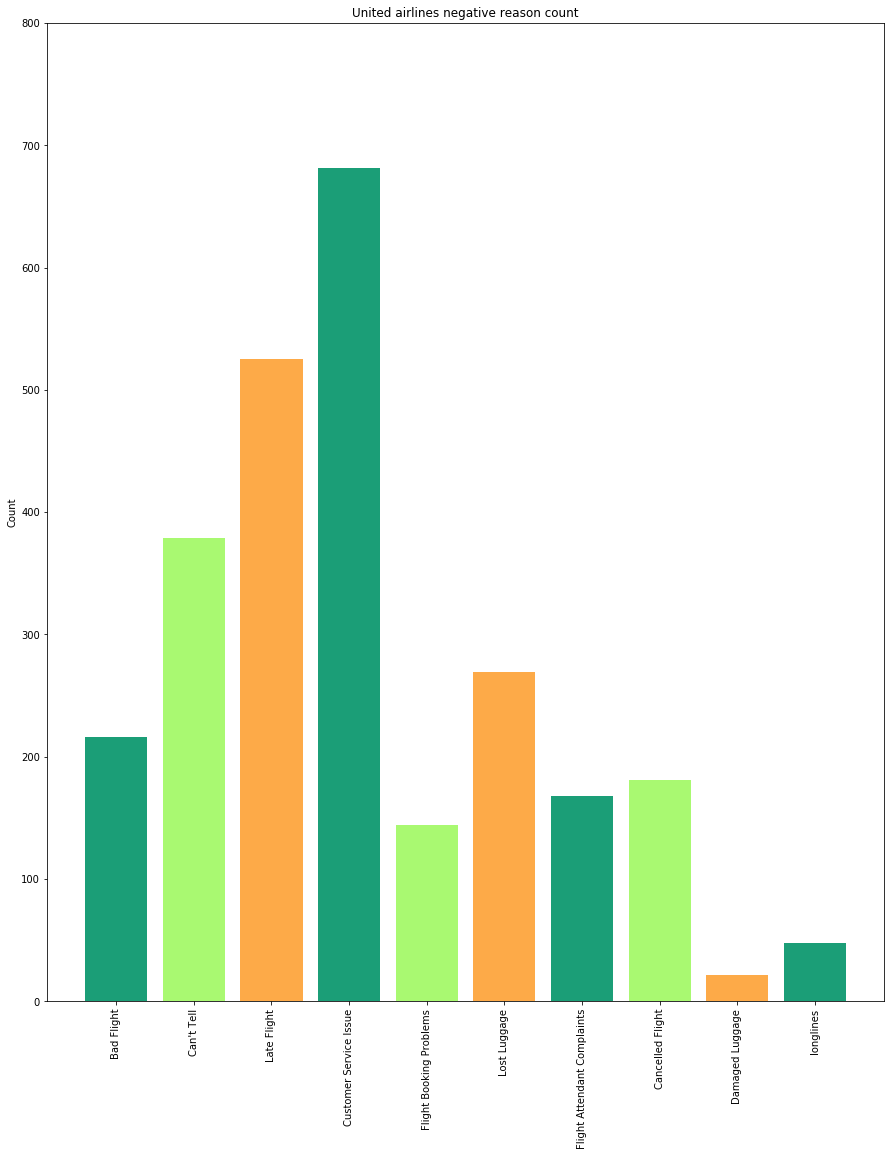

In [147]:
#airline_names = df['airline'].unique()
plt.figure(1,figsize=(15,18))
#plt.subplot(3,2,i+1)
plot_reason('United')
plt.xlabel('')
plt.ylim(0,800)
plt.savefig('united_reasons.png')
plt.show()

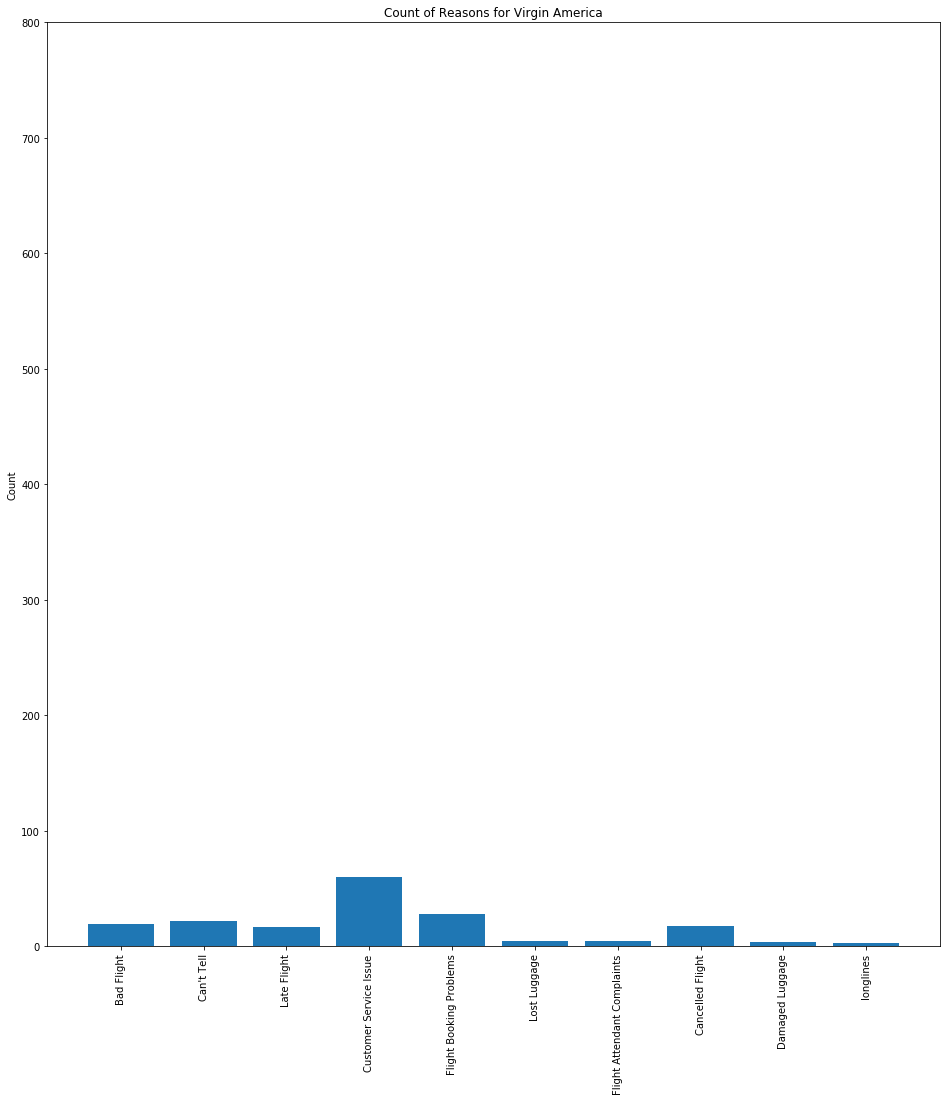

In [134]:
#airline_names = df['airline'].unique()
plt.figure(1,figsize=(16,17))
#plt.subplot(3,2,i+1)
plot_reason('Virgin America')
plt.xlabel('')
plt.ylim(0,800)
plt.show()